In [1]:
%cd "/content/drive/MyDrive/Neural project/"

/content/drive/MyDrive/Neural project


In [2]:
!pwd

/content/drive/MyDrive/Neural project


#Tensorflow version and GPU (OPTIONAL)

In [3]:
# Check tensorflow version and GPU availability
import tensorflow as tf
print('tf version:', tf.__version__)
print('gpu:', tf.config.list_physical_devices('GPU'))

tf version: 2.8.0
gpu: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#Global Constants

In [4]:
IMG_DIMEN = 150
N_COLORS = 3   

In [5]:
import cv2

#Reading Dataset Function

In [6]:
from tqdm import tqdm
import numpy as np
import os

def read_data(dir_path):
    X = []
    y = []
    y_map = {'cats': 0, 'dogs': 1}
    for class_name in y_map.keys():
        subdir_path = os.path.join(dir_path, class_name)
        filenames = os.listdir(subdir_path)
        for fname in tqdm(filenames):
            if fname.endswith('.jpg'):
                img_path = os.path.join(subdir_path, fname)
                img = cv2.imread(img_path)
                img = cv2.resize(img, dsize=(IMG_DIMEN, IMG_DIMEN))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img.reshape((1, IMG_DIMEN, IMG_DIMEN, N_COLORS))
                X.append(img)
                y.append(y_map[class_name])
    X = np.vstack(X).astype('float32')/255.0
    y = np.array(y).astype('int32')
    return X, y

#We read data in x test ,y test

In [7]:
X, y = read_data('data/training_set')

100%|██████████| 4006/4006 [00:42<00:00, 95.13it/s] 


In [8]:
print(X.shape)
print(y.shape)

(8005, 150, 150, 3)
(8005,)


In [9]:
X_test , y_test = read_data('data/test_set')

100%|██████████| 1013/1013 [00:12<00:00, 80.93it/s] 


In [10]:
print(X_test.shape)
print(y_test.shape)

(2023, 150, 150, 3)
(2023,)


#Splitting X,y into train and validation

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=0)

In [12]:
print(X_train.shape)
print(y_train.shape)
print('--------------')
print(X_val.shape)
print(y_val.shape)

(5363, 150, 150, 3)
(5363,)
--------------
(2642, 150, 150, 3)
(2642,)


#Visualising and example image

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    plt.figure(figsize=(6, 6))
    if N_COLORS == 3:
        plt.imshow(img)
    elif N_COLORS == 1:
         plt.imshow(img, cmap='gray')
    plt.show()

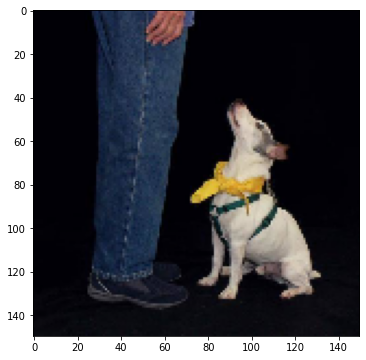

In [14]:
imshow(X_train[3])

#Bulding CNN

In [15]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

In [16]:
model = Sequential()
model.add(Conv2D(16, 7, activation='relu', input_shape=(IMG_DIMEN, IMG_DIMEN, N_COLORS)))
model.add(Conv2D(16, 7, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 5, activation='relu'))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training and Validation

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'saved-model/best-model', monitor='val_loss', mode='min', 
    save_weights_only=True, save_best_only=True, verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=50,
    callbacks=[checkpoint]
)

Epoch 1/50
168/168 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.4966
Epoch 1: val_loss improved from inf to 0.69315, saving model to saved-model/best-model
168/168 [==============================] - 30s 131ms/step - loss: 0.6935 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/50
168/168 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4924
Epoch 2: val_loss improved from 0.69315 to 0.69315, saving model to saved-model/best-model
168/168 [==============================] - 20s 117ms/step - loss: 0.6932 - accuracy: 0.4924 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/50
168/168 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4880
Epoch 3: val_loss did not improve from 0.69315
168/168 [==============================] - 20s 118ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 4/50
168/168 [==============================] - ETA: 0s - loss: 0.6932 - accura

#Visualizin Training History

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.show()

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

#Testing

In [ ]:
model.load_weights('saved-model/best-model')
model.evaluate(X_test, y_test)